In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
#uber_data = pd.read_csv("uber-raw-data-janjune-15.csv")
#uber_data

files = sorted(os.listdir('dataset'))[-7:]
uber_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('dataset/' + file)
    uber_data = pd.concat([uber_data, df])

uber_data.shape

(4662023, 10)

In [3]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
convert_todatetime = uber_data.copy()
convert_todatetime['Date/Time'] = pd.to_datetime(convert_todatetime['Date/Time'])
uber_data['Day of week'] = convert_todatetime['Date/Time'].dt.day_name()
uber_data['Day'] = convert_todatetime['Date/Time'].dt.day
uber_data['Hour'] = convert_todatetime['Date/Time'].dt.hour
uber_data['Minute'] = convert_todatetime['Date/Time'].dt.minute
uber_data['Month'] = convert_todatetime['Date/Time'].dt.month

Text(0.5, 1.0, 'UBER Monthly Pickup Summary in NYC')

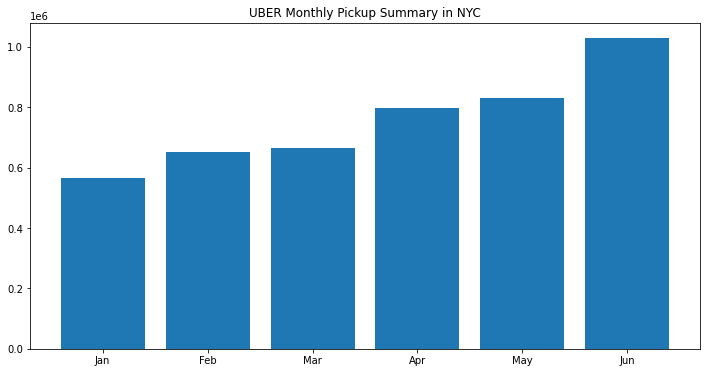

In [5]:
Month = ['Jan','Feb','Mar','Apr','May','Jun']
Index = [0,1,2,3,4,5]
Monthly_pickup = uber_data.groupby(['Month']).size()
plt.figure(1,figsize=(12,6))
plt.bar(Index,Monthly_pickup)
plt.xticks(Index,Month)
plt.title('UBER Monthly Pickup Summary in NYC')

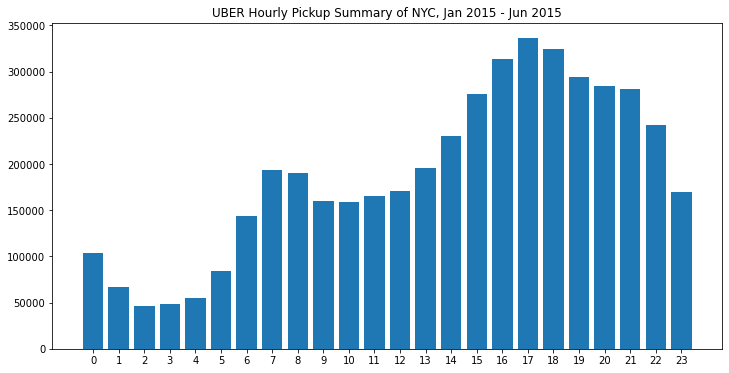

In [6]:
Hourly_pickup = uber_data.groupby(['Hour']).size()
mean = Hourly_pickup.mean()
hour = [i for i in range(0,24)]
plt.figure(1,figsize=(12,6))
plt.bar(hour,Hourly_pickup)
plt.title('UBER Hourly Pickup Summary of NYC, Jan 2015 - Jun 2015')
plt.xlabel("")
plt.xticks(hour,hour)
plt.show()

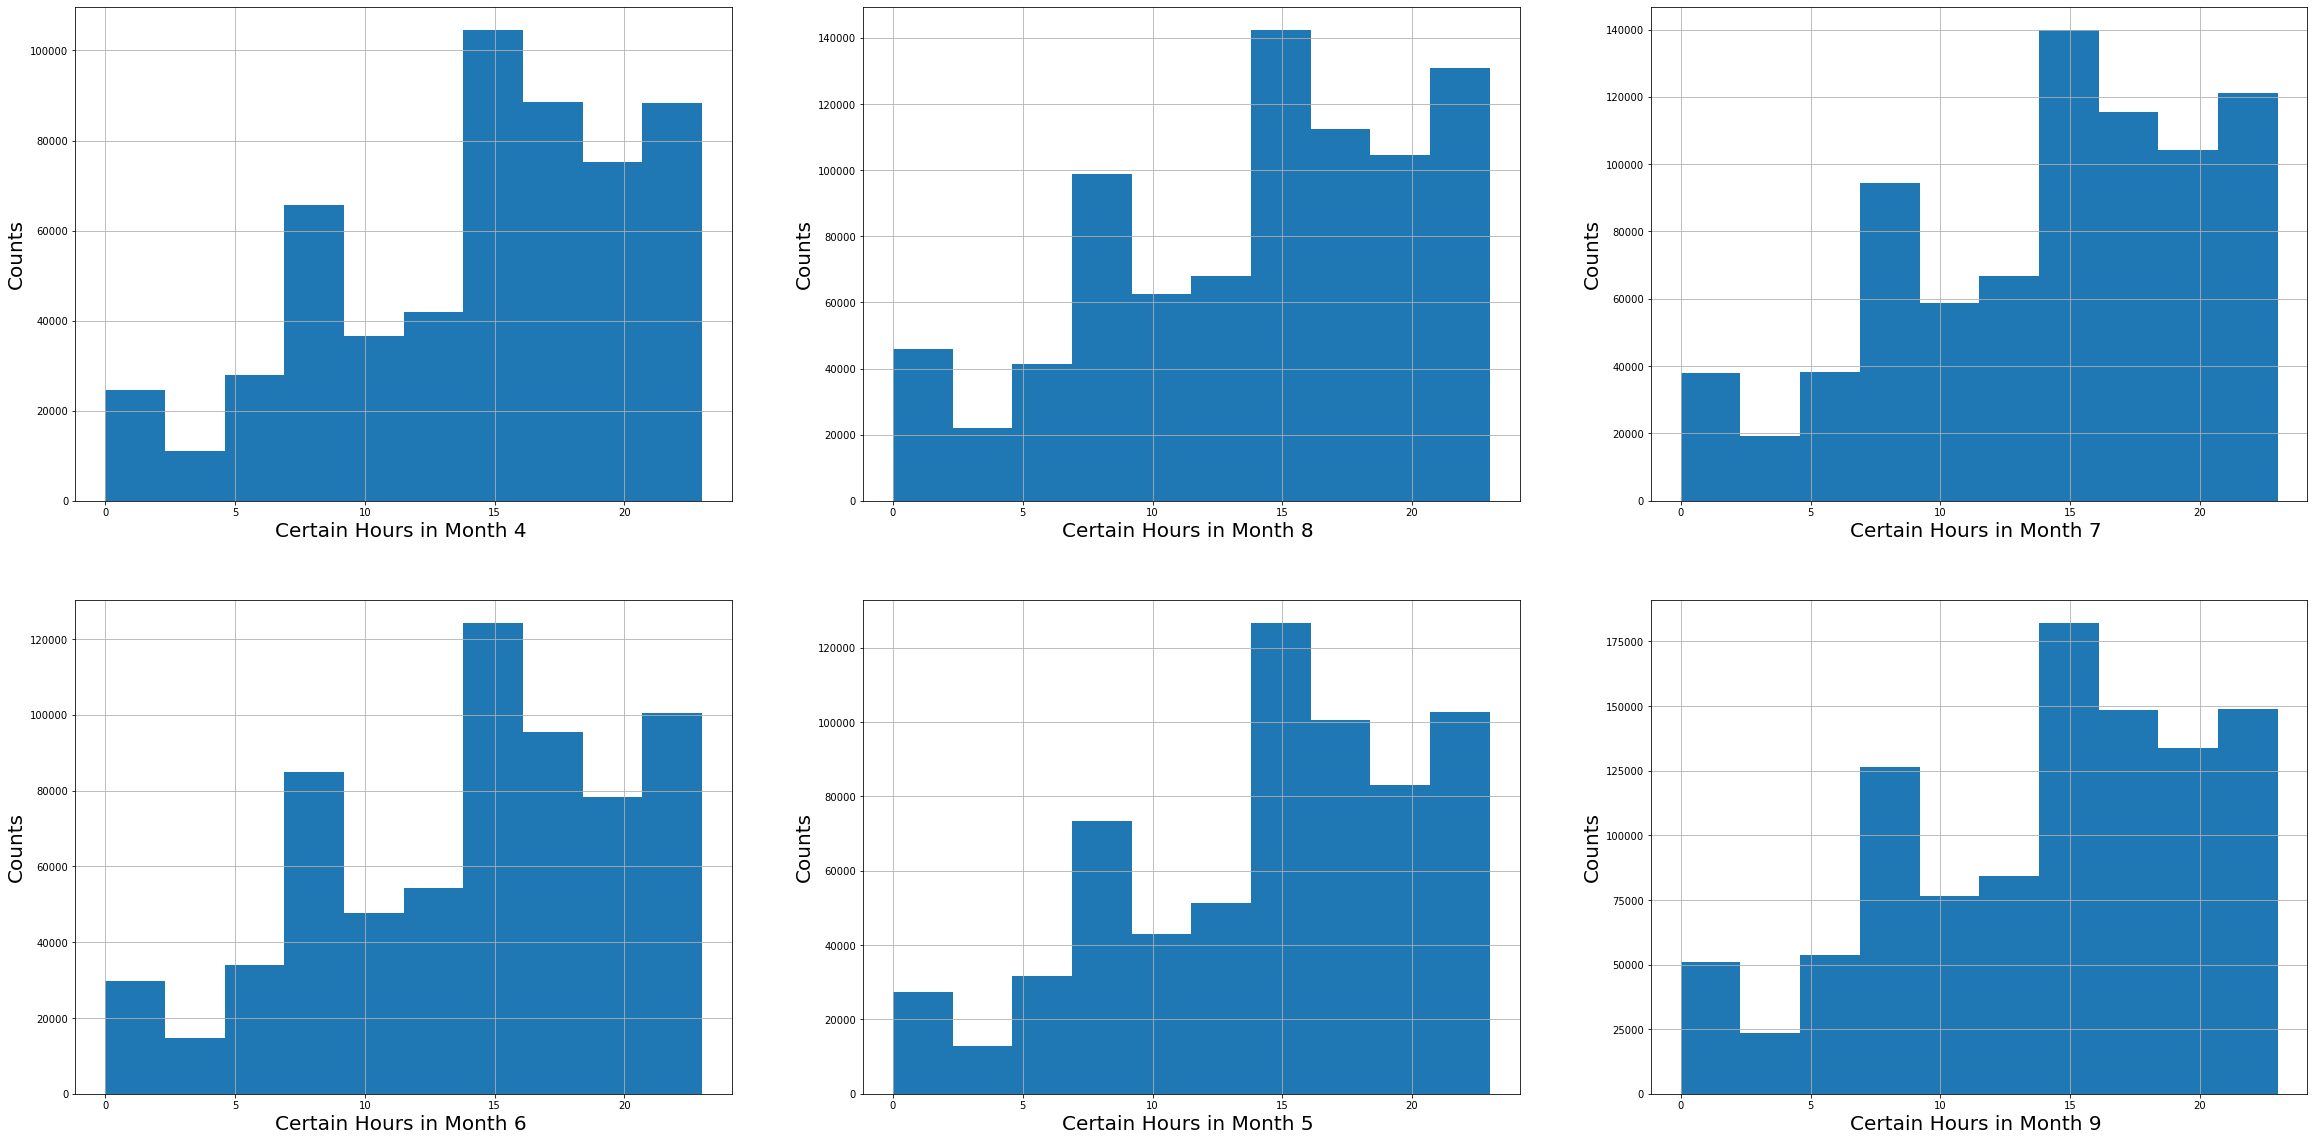

In [7]:
plt.figure(figsize=(40,20))

for i,month in enumerate(uber_data['Month'].unique()):
    plt.subplot(2,3,i+1)
    plt.xlabel('Certain Hours in Month {} '.format(month) ,fontsize=20)
    plt.ylabel('Counts', fontsize=20)
    uber_data[uber_data['Month']==month]['Hour'].hist()


In [8]:
num_of_rides_in_months = uber_data.groupby('Month')['Hour'].count()
num_of_rides_in_months

Month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: Hour, dtype: int64

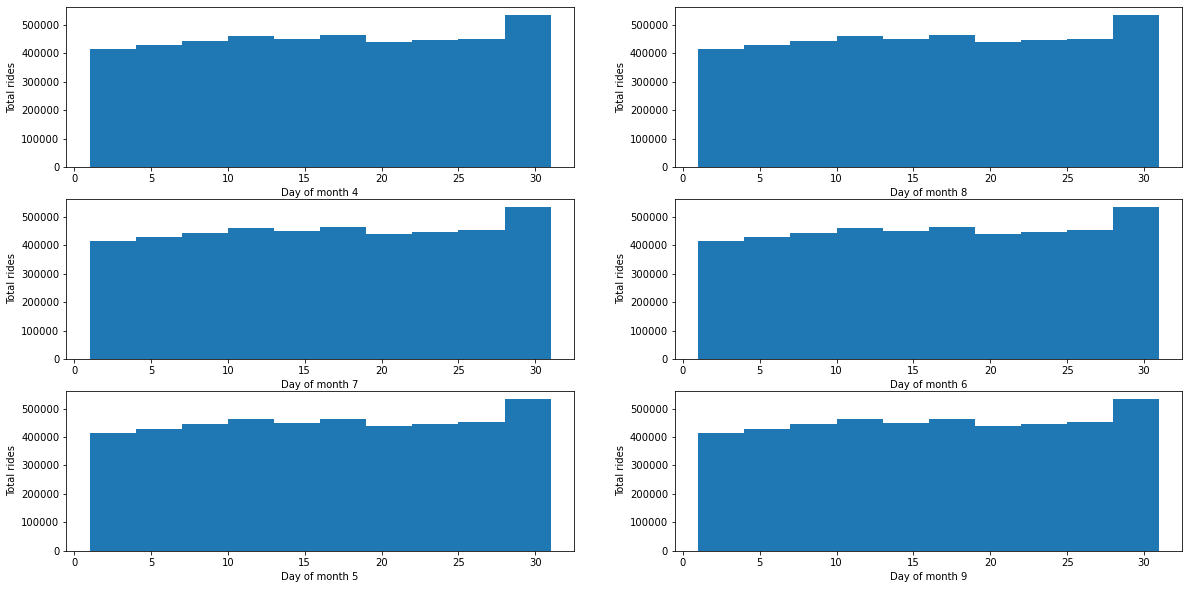

In [9]:
plt.figure(figsize=(20,10))

for i, month in enumerate(uber_data['Month'].unique(),1): 
    plt.subplot(3,2,i)
    df_out = uber_data[uber_data['Month']==month]
    plt.hist(uber_data['Day'])
    plt.xlabel('Day of month {}'.format(month))
    plt.ylabel('Total rides')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

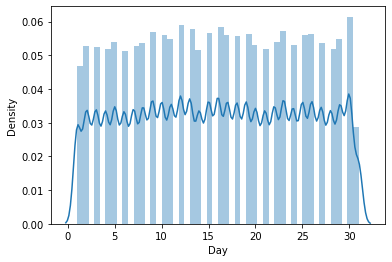

In [10]:
sns.distplot(uber_data['Day'])

Text(0.5, 1.0, 'Journey by month day')

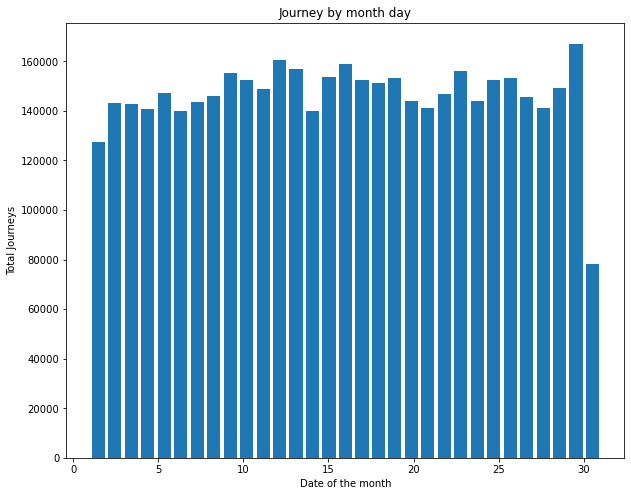

In [11]:
plt.figure(figsize=(10,8))
plt.hist(uber_data['Day'], bins=31, rwidth=0.8) # bins is the number of equal width in the graphs
plt.xlabel('Date of the month')
plt.ylabel('Total Journeys')
plt.title('Journey by month day')

Text(0.5, 1.0, 'offday vs Base of passenger')

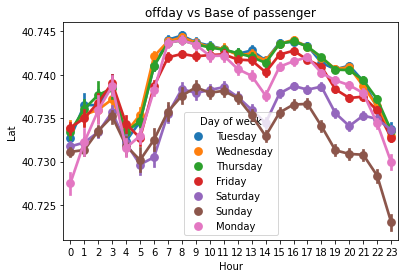

In [12]:
ax = sns.pointplot(x='Hour', y='Lat',data=uber_data, hue='Day of week')
ax.set_title('offday vs Base of passenger')

In [13]:
base = uber_data.groupby(['Base', 'Month'])['Date/Time'].count().reset_index()
base

,Base,Month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


<AxesSubplot:xlabel='Month', ylabel='Date/Time'>

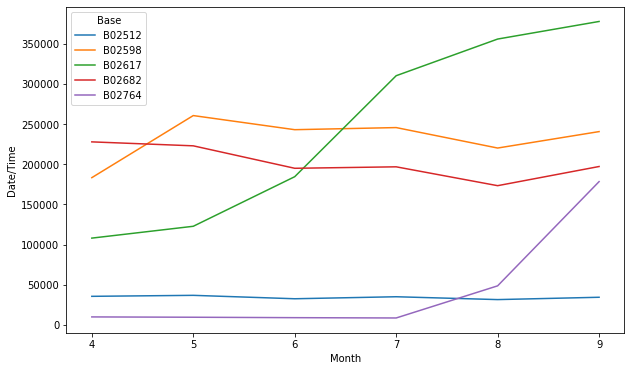

In [14]:
plt.figure(figsize=(10,6))

sns.lineplot(x='Month', y='Date/Time', data=base, hue='Base')

In [15]:
# all_data.value_counts(subset=['Day of week', 'Hour']) 
dayofweek_hour = uber_data.groupby(['Day of week', 'Hour']).size()
dayofweek_hour

Day of week  Hour
Friday       0       13716
             1        8163
             2        5350
             3        6930
             4        8806
                     ...  
Wednesday    19      47017
             20      47772
             21      44553
             22      32868
             23      18146
Length: 168, dtype: int64

In [16]:
pivot = dayofweek_hour.unstack()
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

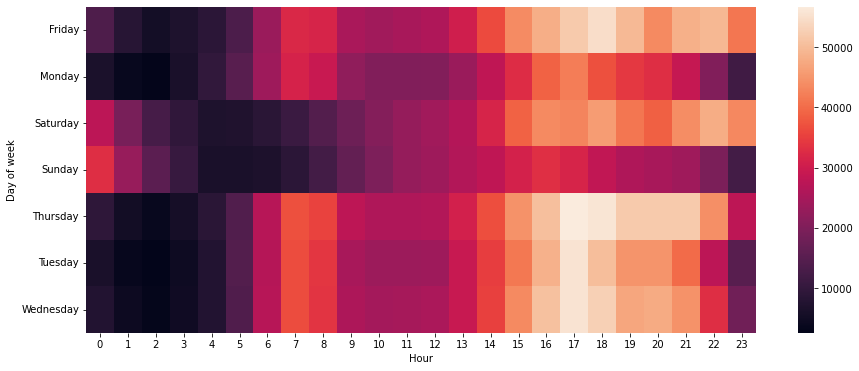

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(pivot)